In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scraping import Dbase
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
data = Dbase()
df1 = data.imdb_requests()

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         250 non-null    object 
 1   genre1         250 non-null    object 
 2   genre2         250 non-null    object 
 3   genre3         250 non-null    object 
 4   nb_genres      250 non-null    int64  
 5   released_year  250 non-null    int64  
 6   director1      250 non-null    object 
 7   director2      250 non-null    object 
 8   director3      250 non-null    object 
 9   nb_directors   250 non-null    int64  
 10  grade          250 non-null    float64
 11  votes          250 non-null    int64  
 12  gross(M$)      250 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 25.5+ KB


# Objectif : Prédiction de la note

In [ ]:
#!pip install pandas_profiling


In [ ]:
df1

## Observation

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df1.sample(n=250))
prof.to_file(output_file='output.html')

In [ ]:
import statsmodels.api as sm

sm.qqplot(df1['grade'], line = 'r')
plt.show()

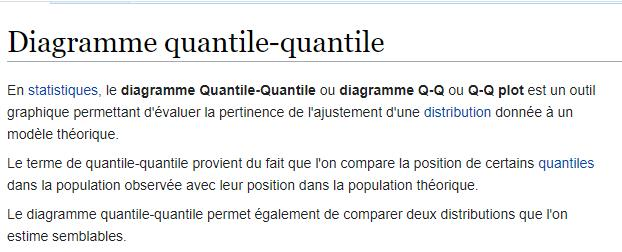

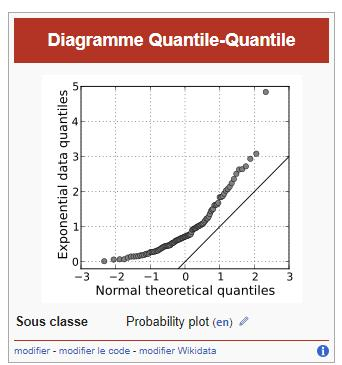

## Numerical variables

In [ ]:
df2 = pd.DataFrame()
df2['pearson'] = abs(df1.corr(method = 'pearson'))['grade']

In [ ]:
df2['spearman'] = abs(df1.corr(method = 'spearman'))['grade']

In [ ]:
df2['kendall'] = abs(df1.corr(method = 'kendall'))['grade']

In [ ]:
df2

* **Par rapport au model prédictif, Seul 'votes' bénéficie d'une corrélation intéressante**

## Categorial variables

In [ ]:
df_cat = df1[['genre1','director1']]
df_cat
        

In [ ]:
#df_cat2 = pd.DataFrame(df1, columns = ['genre1', 'director1'])
#df_cat2

In [ ]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="genre1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

In [ ]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="director1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

In [ ]:
df1['director1'].value_counts()

In [ ]:
df1['director1'].nunique()

In [ ]:
df4 = df1.head(25)

In [ ]:
sns.boxplot(x="director1", y="grade", data=df4)

In [ ]:
df1[df1['director1']=='Frank Darabont']

In [ ]:
df5 = df1[:100].copy()


In [ ]:
df6 = pd.get_dummies(data=df5, columns=['director1','genre1'])

In [ ]:
df6

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MinMaxScaler()
keepCols = ['votes']
scaled_df = scaler.fit_transform(df6[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)

scaled_df

In [ ]:
df6['votes'] = scaled_df

# NECESSITE DE SCALER LES DONNES NUMERIQUES

In [ ]:
#importer les données Advertising.csv
list_var = df6.drop(['titles','genre2','genre3','nb_genres','released_year','director2','director3','nb_directors','grade','gross(M$)'],axis = 1)
list_var                    
                     
                     

In [ ]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg=LinearRegression()

y=df6['grade']
X=list_var

modeleReg.fit(X,y)

In [ ]:
print(f'La constante est égale à : {modeleReg.intercept_}')
print(f'Les coefficients directeurs sont respectivement de : {modeleReg.coef_}')

#calcul du R²
Rcarre = modeleReg.score(X,y)
print(f'le R² est de : {Rcarre}')

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))
print(f'La RMSE est de : {RMSE}')

In [ ]:
plt.plot(y, modeleReg.predict(X),'.')
plt.show()

In [ ]:
plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def prepare_machine(df):
    df = pd.get_dummies(data=df, columns=['director1', 'genre1'])
    scaler = MinMaxScaler()
    keepCols = ['votes']
    scaled_df = scaler.fit_transform(df[keepCols])
    scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
    df['votes'] = scaled_df
    df = df.drop(['genre2', 'genre3', 'nb_genres', 'released_year',
                  'director2', 'director3', 'nb_directors', 'gross(M$)'], axis=1)
    return df

In [ ]:
def create_model(df):
    df = prepare_machine(df)
    df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)
    
    cut = round(len(df)*0.995)
    train = df
    #train = df.iloc[:cut,:]
    #test = df[50:59]
    test = df.iloc[cut:,:]
    
    y = train['grade']
    X = train.drop(['titles','grade'],axis = 1)
      
    model=LinearRegression()
    model.fit(X,y)
    Rcarre = model.score(X,y)
    
    y = test['grade']
    nom = test['titles'].iloc[0]
    X = test.drop(['titles','grade'],axis = 1)
      
    prediction = model.predict(X)
    
    #RMSE=np.sqrt(((y-prediction)**2).sum()/len(y))
    rmse = mean_squared_error(prediction,y)**(1/2)
    return print(f"""
    Pour le film : {nom}, valeur attendue : {y.iloc[0]}, la prédiction est de {round(prediction[0],1)}
    R2 = {Rcarre}
    rmse = {rmse}
    """)

In [ ]:
create_model(df1)

In [ ]:
list(df1['director1'].value_counts().index)
list(df1['genre1'].value_counts().index)

In [ ]:
df1[df1['genre1'] == 'Animation'].head()

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

In [ ]:
# Interact with specification of arguments
@interact
def affiche(titles='Ajouter_titre',
            director1=list(df1['director1'].value_counts().index),
            genre1=list(df1['genre1'].value_counts().index),
            votes = (0,1,0.1)
            ):
    df = prepare_machine(df1)
    df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

    train = df

    test = train[0:1]
    a = test.iloc[:, 3:]
    for i in a:
        test[i] = 0
    test['titles'] = titles
    test['genre1_'+genre1] = 1
    test['director1_'+director1] = 1
    test['votes'] = votes

    y = train['grade']
    X = train.drop(['titles', 'grade'], axis=1)

    model = LinearRegression()
    model.fit(X, y)
    Rcarre = model.score(X, y)
    prediction = model.predict(X)
    rmse = mean_squared_error(prediction, y)**(1/2)
    
    nom = test['titles'].iloc[0]
    X = test.drop(['titles', 'grade'], axis=1)

    prediction = model.predict(X)
    if prediction < 0 or prediction > 10:
        prediction = ['impossible, ça ne sait pas faire ce genre de film']

    return f"""Le film : {nom} aura une note de : {prediction[0]}"""

In [ ]:
# Distribution de la variable grade: 

In [ ]:
sns.histplot(x='grade', data=df1)

In [ ]:
df1['grade'].plot.kde()

In [ ]:
df1['votes'].plot.kde()

In [ ]:
#comparaison des distributions avec un boxplot
df1.boxplot(column='grade',by='nb_directors')

In [ ]:
#comparaison des distributions avec un boxplot
df1.boxplot(column='grade',by='nb_genres')

In [ ]:
#top_votes = df1.groupby(['titles','votes']).votes.agg([len]).sort_values(by ='votes', ascending = False)
top_votes = df1[['titles','votes','grade','genre1','director1']].sort_values(by ='votes', ascending = False)

In [ ]:
top_votes

In [ ]:
top_10_votes = top_votes[:10]

top_10_votes

In [ ]:
len(top_10_votes)

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='grade', y="titles", data=top_10_votes, hue="votes", palette='coolwarm')

In [ ]:
top_50_votes = top_votes[:50]
top_50_votes

In [ ]:
top_20_votes = top_50_votes[:20]

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_20_votes, x='genre1')

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_50_votes, x='genre1')

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_50_votes, order=top_50_votes['director1'].value_counts().index , y='director1')

In [ ]:
# Analyse des tops votes:

In [ ]:
#